# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['lithakia', 'amderma', 'bolungarvik', 'zhigansk', 'cape town', 'hobart', 'belushya guba', 'pasni', 'jamestown', 'katsuura', 'anloga', 'atuona', 'monrovia', 'sungairaya', 'sao filipe', 'daru', 'busselton', 'nome', 'albany', 'ahipara', 'lahan', 'vestmannaeyjar', 'vranje', 'port macquarie', 'mingshui', 'mount gambier', 'faanui', 'lagoa', 'rikitea', 'qaanaaq', 'punta arenas', 'vanderhoof', 'alice springs', 'mataura', 'bubaque', 'saskylakh', 'saryshagan', 'hofn', 'upernavik', 'georgetown', 'tuktoyaktuk', 'belaya gora', 'yellowknife', 'vila franca do campo', 'alyangula', 'port hardy', 'bonavista', 'vestbygda', 'kavieng', 'ponta do sol', 'kushima', 'thompson', 'itarema', 'vestmanna', 'ushuaia', 'port elizabeth', 'ribeira grande', 'laguna', 'haines junction', 'carnarvon', 'severo-kurilsk', 'ucluelet', 'tasiilaq', 'hermanus', 'moron', 'cherskiy', 'east london', 'palana', 'buzescu', 'bredasdorp', 'vila velha', 'calancuasan', 'jalu', 'avarua', 'chupa', 'vanavara', 'kaa-khem', 'longyearbyen', 'sp

In [28]:
print(len(cities))

598


In [30]:
cities_df = pd.DataFrame({"City": cities,})
print(cities_df)

                 City
0            lithakia
1             amderma
2         bolungarvik
3            zhigansk
4           cape town
5              hobart
6       belushya guba
7               pasni
8           jamestown
9            katsuura
10             anloga
11             atuona
12           monrovia
13         sungairaya
14         sao filipe
15               daru
16          busselton
17               nome
18             albany
19            ahipara
20              lahan
21     vestmannaeyjar
22             vranje
23     port macquarie
24           mingshui
25      mount gambier
26             faanui
27              lagoa
28            rikitea
29            qaanaaq
..                ...
568           rexburg
569          portland
570  kamensk-uralskiy
571           honiara
572             pilar
573        mandalgovi
574            beloha
575           quthing
576        hornepayne
577          ilhabela
578           northam
579    soto la marina
580            baykit
581       

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
city_list = []
temp_list = []
lat_list = []
lng_list = []
humidity_list = []
cloud_list = []
wind_list = []

j = 0
i = 1

while j < 600:
    city_value = cities_df.loc[j, 'City']
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={api_key}&units=imperial&q={city_value}"
    response = requests.get(query_url).json()
    r = requests.head(query_url)
    if response != [] and r.status_code == 200:
        try:
            print(f"{i}. Getting information for {city_value}.")
            city_list.append(response['name'])
            temp_list.append(response['main']['temp'])
            lat_list.append(response['coord']['lat'])
            lng_list.append(response['coord']['lon'])
            humidity_list.append(response['main']['humidity'])
            cloud_list.append(response['clouds']['all'])
            wind_list.append(response['wind']['speed'])            
            print(f'Sleeping for 1 second to avoid disconnection.')
            time.sleep(1.0)
            print(f'------------------------------------------')
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
                
    j += 1
    i += 1
    print(f'Moving on to the next city in the list...')
    print(f'------------------------------------------')

1. Getting information for lithakia.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
4. Getting information for zhigansk.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
5. Getting information for cape town.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
6. Getting information for hobart.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
43. Getting information for yellowknife.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
44. Getting information for vila franca do campo.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
45. Getting information for alyangula.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
46. Getting information for port hardy.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
47. Ge

83. Getting information for sunrise manor.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
84. Getting information for san vicente.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
87. Getting information for mollendo.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
88. Getting information for smithers.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
-----------------

125. Getting information for boa vista.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
127. Getting information for broome.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
128. Getting information for belmonte.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
129. Getting information for srednekolymsk.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
130. Getting information for verkhnyaya inta.
Sleeping for 

166. Getting information for knysna.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
167. Getting information for lubumbashi.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
169. Getting information for cidreira.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
170. Getting information for puerto baquerizo moreno.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
171. Getting information for jinchang.
Sleeping 

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
207. Getting information for richards bay.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
208. Getting information for luau.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
209. Getting information for watsa.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
210. Getting information for alofi.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
211. Getting information f

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
248. Getting information for yeppoon.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
249. Getting information for namibe.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
250. Getting information for medicine hat.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
251. Getting information for winnemucca.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the 

289. Getting information for jacareacanga.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
290. Getting information for kidero.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
291. Getting information for guiuan.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
293. Getting information for dano.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
294. Getting information for wittlich.
Sleeping for 1 second to avo

------------------------------------------
Moving on to the next city in the list...
------------------------------------------
330. Getting information for cururupu.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
331. Getting information for namtsy.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
333. Getting information for mokhsogollokh.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
334. Getting information for paka.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next

369. Getting information for cascais.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
370. Getting information for yar-sale.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
371. Getting information for sovetskoye.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
372. Getting information for san andres.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
373. Getting information for san cristobal.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to

Moving on to the next city in the list...
------------------------------------------
410. Getting information for hambantota.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
411. Getting information for anisoc.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
412. Getting information for pyaozerskiy.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
414. Getting information for puerto escondido.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
----------

Moving on to the next city in the list...
------------------------------------------
454. Getting information for cockburn town.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
455. Getting information for casablanca.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
456. Getting information for gamba.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
457. Getting information for washougal.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
----------------

Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
499. Getting information for chiman.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
500. Getting information for vanimo.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
501. Getting information for banda aceh.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
502. Getting information for san policarpo.
Sleeping for 1 second to avoid disconnection.
------------------

538. Getting information for camacha.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
540. Getting information for candolim.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
541. Getting information for locri.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
542. Getting information for humaita.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
543. Getting information for manggar.
Sleeping for 1 second to avoid

580. Getting information for soto la marina.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
581. Getting information for baykit.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
583. Getting information for ornskoldsvik.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
584. Getting information for sobolevo.
Sleeping for 1 second to avoid disconnection.
------------------------------------------
Moving on to the next city in the list...
------------------------------------------
585. Getting information for saint anthony.
Sleeping fo

KeyError: 'the label [598] is not in the [index]'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
weather_df = pd.DataFrame({"City":city_list, "Cloudiness":cloud_list,"Humidity":humidity_list,
                           "Latitude":lat_list,"Longitude":lng_list, "Temperature":temp_list, "Wind Speed": wind_list})
weather_df

,City,Cloudiness,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,Lithakia,0,75,37.72,20.83,43.54,7.14
1,Zhigansk,56,52,66.77,123.37,-30.94,9.31
2,Cape Town,0,64,-33.93,18.42,73.40,12.75
3,Hobart,20,57,-42.88,147.33,75.20,16.11
4,Pasni,0,91,25.26,63.48,73.73,8.30
5,Jamestown,80,20,-33.21,138.60,96.59,8.86
6,Katsuura,20,39,33.93,134.50,48.24,17.22
7,Anloga,20,83,5.79,0.90,82.40,4.70
8,Atuona,88,100,-9.80,-139.03,79.40,19.44
9,Monrovia,40,94,6.33,-10.80,77.00,6.93


In [54]:
weather_df.count()

City           534
Cloudiness     534
Humidity       534
Latitude       534
Longitude      534
Temperature    534
Wind Speed     534
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

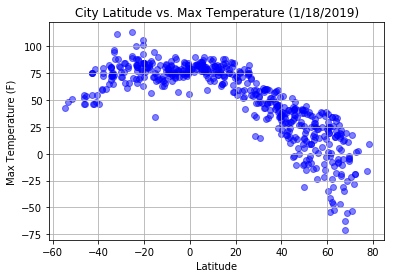

In [49]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"],marker="o", color="b", alpha = 0.5)
plt.title("City Latitude vs. Max Temperature (1/18/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

#### Latitude vs. Humidity Plot

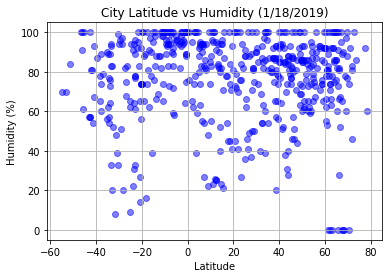

In [50]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", color="b", alpha = 0.5)
plt.title("City Latitude vs Humidity (1/18/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

#### Latitude vs. Cloudiness Plot

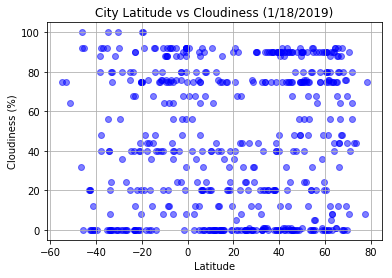

In [51]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", color="b", alpha = 0.5)
plt.title("City Latitude vs Cloudiness (1/18/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

#### Latitude vs. Wind Speed Plot

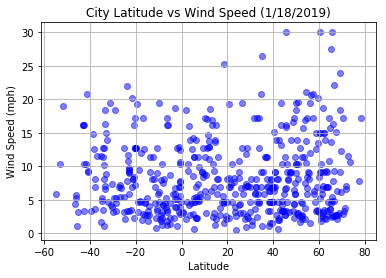

In [52]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", color="b", alpha = 0.5)
plt.title("City Latitude vs Wind Speed (1/18/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()